In [1]:
import glob
import os
path = '/home/audretj/developer-projects/earthquake-recognition/data/everywhere-once'
paths = glob.glob(os.path.join(path, '*/'))

In [2]:
def minmag(name):
    return 'minmag' in name

def fix(name):
    return name.split('-minmag1')[0]
    
def fix_name(path):
    path = str(path[:-1])
    name = os.path.basename(path)
    return fix(name) if minmag(name) else name

stations = map(fix_name, paths)
stations = list(stations)

name_to_coords = {'AmatriceQuakes': {'lat': '42.790', 'long': '13.150'},
                  'OklahomaQuakes': {'lat': '37.081', 'long': '-97.309'},
                  'SouthAmerica': {'lat': '-25.3', 'long': '-71'}
                 }

to_name = lambda dic: dic['lat'] + '|' + dic['long']

for i, station in enumerate(stations):
    if station in name_to_coords:
        stations[i] = to_name(name_to_coords[station])
    else:
        stations[i] = station.replace('--', '|')

stations[stations.index('-15.447148-167.203232')] = '-15.447148|167.203232'
stations[stations.index('-20.7771-167.240204')] = '-20.7771|167.240204'

In [11]:
from obspy.clients.fdsn import Client
from obspy import Inventory
from pprint import pprint
client = Client('IRIS')

def get_stations(lat, long):
    return client.get_stations(latitude=lat, longitude=long, maxradius=2)

names = stations
positions = [name.split('|') for name in names]
inventories = []

i = 0
for lat, long in positions:
    try:
        inventories.append(get_stations(lat, long))
    except Exception:
        print("Failed", i)
        i += 1
        pass

Failed 0
Failed 1
Failed 2
Failed 3


In [12]:
invens = []
items = [inventory.select(inventory[0].code) for inventory in inventories]

def select_stations(inventory):
    network = inventory[0]
    network = network.select(network[0].code)
    inventory.networks = [network]
    return inventory

items = list(map(select_stations, items))

In [13]:
from functools import reduce
from operator import add

inventory = reduce(add, items)

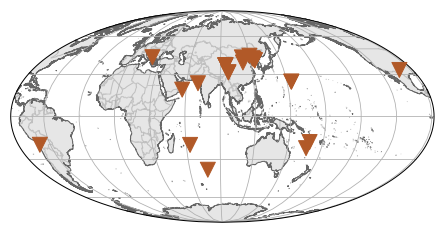

In [15]:
from matplotlib import pyplot as plt

inventory.plot(projection='global', resolution='f', label=False, outfile='map.png')
plt.show()